In [1]:
import pandas as pd 
import numpy as np
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import mplfinance as mpf
from sklearn import metrics

In [2]:
df = yf.download(tickers = "EURUSD=X",period = "2y",interval = "1h",group_by = 'ticker',
                 auto_adjust = True,prepost = True,threads = True,proxy = None)
df = pd.DataFrame(df)
df =df.drop(columns='Volume')
df =df.drop(columns='Open')


[*********************100%***********************]  1 of 1 completed


In [3]:
df = df[:-24]
print(df)

                               High       Low     Close
2020-07-09 00:00:00+01:00  1.134301  1.133530  1.134044
2020-07-09 01:00:00+01:00  1.135332  1.133658  1.133787
2020-07-09 02:00:00+01:00  1.134430  1.133144  1.134173
2020-07-09 03:00:00+01:00  1.135074  1.134044  1.135074
2020-07-09 04:00:00+01:00  1.136751  1.134687  1.136493
...                             ...       ...       ...
2022-07-07 18:00:00+01:00  1.016260  1.014816  1.015950
2022-07-07 19:00:00+01:00  1.017191  1.015950  1.016260
2022-07-07 20:00:00+01:00  1.016777  1.015744  1.016673
2022-07-07 21:00:00+01:00  1.016777  1.015950  1.016363
2022-07-07 22:00:00+01:00  1.016777  1.016157  1.016467

[12357 rows x 3 columns]


In [4]:
df['High1'] = df['High'].shift(-1)
df['Low1'] = df['Low'].shift(-1)
df['Close1'] = df['Close'].shift(-1)

df['High2'] = df['High'].shift(-2)
df['Low2'] = df['Low'].shift(-2)
df['Close2'] = df['Close'].shift(-2)

df['High3'] = df['High'].shift(-3)
df['Low3'] = df['Low'].shift(-3)
df['Close3'] = df['Close'].shift(-3)

df['High4'] = df['High'].shift(-4)
df['Low4'] = df['Low'].shift(-4)
df['Close4'] = df['Close'].shift(-4)

df['High5'] = df['High'].shift(-5)
df['Low5'] = df['Low'].shift(-5)
df['Close5'] = df['Close'].shift(-5)

df['High6'] = df['High'].shift(-6)
df['Low6'] = df['Low'].shift(-6)
df['Close6'] = df['Close'].shift(-6)

df['High7'] = df['High'].shift(-7)
df['Low7'] = df['Low'].shift(-7)
df['Close7'] = df['Close'].shift(-7)

df['High8'] = df['High'].shift(-8)
df['Low8'] = df['Low'].shift(-8)
df['Close8'] = df['Close'].shift(-8)

df['High9'] = df['High'].shift(-9)
df['Low9'] = df['Low'].shift(-9)
df['Close9'] = df['Close'].shift(-9)

df['High10'] = df['High'].shift(-10)
df['Low10'] = df['Low'].shift(-10)
df['Close10'] = df['Close'].shift(-10)

df['High11'] = df['High'].shift(-11)
df['Low11'] = df['Low'].shift(-11)
df['Close11'] = df['Close'].shift(-11)

df['High12'] = df['High'].shift(-12)
df['Low12'] = df['Low'].shift(-12)
df['Close12'] = df['Close'].shift(-12)

df['High13'] = df['High'].shift(-13)
df['Low13'] = df['Low'].shift(-13)
df['Close13'] = df['Close'].shift(-13)

df['High14'] = df['High'].shift(-14)
df['Low14'] = df['Low'].shift(-14)
df['Close14'] = df['Close'].shift(-14)

df['High15'] = df['High'].shift(-15)
df['Low15'] = df['Low'].shift(-15)
df['Close15'] = df['Close'].shift(-15)

df['High16'] = df['High'].shift(-16)
df['Low16'] = df['Low'].shift(-16)
df['Close16'] = df['Close'].shift(-16)

df['High17'] = df['High'].shift(-17)
df['Low17'] = df['Low'].shift(-17)
df['Close17'] = df['Close'].shift(-17)

df['High18'] = df['High'].shift(-18)
df['Low18'] = df['Low'].shift(-18)
df['Close18'] = df['Close'].shift(-18)

df['High19'] = df['High'].shift(-19)
df['Low19'] = df['Low'].shift(-19)
df['Close19'] = df['Close'].shift(-19)

df['High20'] = df['High'].shift(-20)
df['Low20'] = df['Low'].shift(-20)
df['Close20'] = df['Close'].shift(-20)

df = df[:-20]
#print(df)

In [5]:
forecast_out = int(12)
df['Prediction'] = df['Close20'].shift(-forecast_out)
#print(df) 


In [6]:
X = pd.DataFrame(df.drop(columns='Prediction'))
#X = preprocessing.scale(X)
X_forecast = X[-forecast_out:]
df = df[:-forecast_out]
#print(df)

In [7]:
features = X.shape[1]

test_point = np.round(len(df)*0.1)
test_index = int(len(df)-test_point)

train = df.iloc[:test_index]
test = df.iloc[test_index:]

X_train, Y_train = train.iloc[:, :-1], pd.DataFrame(train.iloc[:, -1])
X_test, Y_test = test.iloc[:, :-1], pd.DataFrame(test.iloc[:, -1])

length = 1

trainX = np.array([X_train], order='C')
trainX.resize((X_train.shape[0], length, features))
testX = np.array([X_test], order='C')
testX.resize((X_test.shape[0], length, features))
forecastX = np.array([X_forecast], order='C')
forecastX.resize((X_forecast.shape[0], length, features))


In [8]:
#Training
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model = Sequential()
model.add(LSTM(features, input_shape=(length,features), activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam', loss='mse')
model.fit(trainX, Y_train,
          epochs=100,
          batch_size=70, 
          validation_data=(testX, Y_test),
          callbacks=[early_stop]
          )

Epoch 1/100
159/159 [==============================] - 2s 4ms/step - loss: 0.0444 - val_loss: 0.0013
Epoch 2/100
159/159 [==============================] - 0s 2ms/step - loss: 1.5152e-04 - val_loss: 0.0011
Epoch 3/100
159/159 [==============================] - 0s 2ms/step - loss: 1.4066e-04 - val_loss: 0.0010
Epoch 4/100
159/159 [==============================] - 1s 4ms/step - loss: 1.2818e-04 - val_loss: 9.9078e-04
Epoch 5/100
159/159 [==============================] - 0s 3ms/step - loss: 1.1445e-04 - val_loss: 7.9155e-04
Epoch 6/100
159/159 [==============================] - 0s 3ms/step - loss: 9.8014e-05 - val_loss: 6.0481e-04
Epoch 7/100
159/159 [==============================] - 0s 3ms/step - loss: 8.4428e-05 - val_loss: 5.7305e-04
Epoch 8/100
159/159 [==============================] - 0s 3ms/step - loss: 6.8820e-05 - val_loss: 4.2705e-04
Epoch 9/100
159/159 [==============================] - 0s 3ms/step - loss: 5.6084e-05 - val_loss: 3.3587e-04
Epoch 10/100
159/159 [=============

<AxesSubplot:>

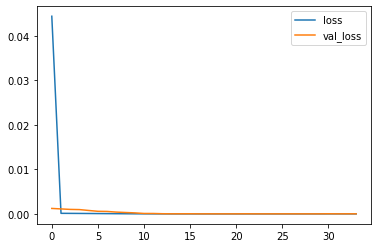

In [9]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [10]:
#Testing
testpredictions = model.predict(testX)
print('R2 Score is: ', metrics.explained_variance_score(Y_test, testpredictions))
print('Root Mean Squared Error is: ', np.sqrt(metrics.mean_squared_error(Y_test, testpredictions)))
print('Mean Absolute Error is: ', metrics.mean_absolute_error(Y_test, testpredictions))
print('Mean Absolute Percentage Error is: ', metrics.mean_absolute_percentage_error(Y_test, testpredictions))

39/39 [==============================] - 0s 1ms/step
R2 Score is:  0.7890779087530622
Root Mean Squared Error is:  0.006457704930605051
Mean Absolute Error is:  0.004947920898338417
Mean Absolute Percentage Error is:  0.004704169617688594


In [11]:
forecast_prediction = model.predict(forecastX)
print(forecast_prediction)

1/1 [==============================] - 0s 16ms/step
[[-1.6240526]
 [-1.6130873]
 [-1.5921862]
 [-1.6051366]
 [-1.6066413]
 [-1.5979444]
 [-1.5970604]
 [-1.6037514]
 [-1.6063564]
 [-1.6005671]
 [-1.5990689]
 [-1.6031961]]


Max = [-1.5921862]
Min = [-1.6240526]


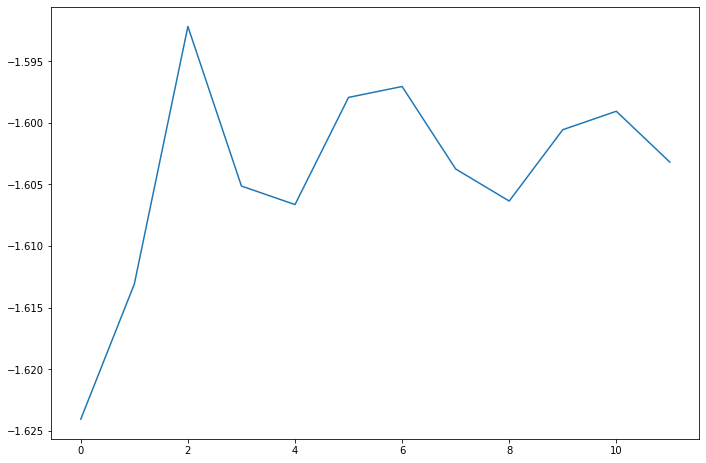

In [12]:
print('Max =',max(forecast_prediction))
print('Min =',min(forecast_prediction))
plt.axes([1, 2, 1.5 , 1.5])
plt.plot(forecast_prediction)